#### 2-dimentional animation of fields

I added an appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [2]:
def set_parameters(parameters_file: str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        return TIME, dt, DTS, SIZE_X, SIZE_Y

In [3]:
def set_field(Field: list, TIME, DTS, field_to_read: str):
    with open(field_to_read, 'r') as f:
        f.readline()
        f.readline()
        for t in range(int(TIME/DTS)):
            temp = f.readline() 
            temp = temp.split('\t')[:-1]
            Field_X = []
            for X in range(len(temp)) : # [0.01, 0.02, 0.03]
                Field_X.append(list(map(float, temp[X].split(' ')[:-1])))
            Field.append(Field_X)

In [23]:
import matplotlib.pyplot as plt

def set_imshow(subplot, Field: list, cmap_, SIZE_X, SIZE_Y):
    return subplot.imshow(Field[5],
                cmap = plt.get_cmap('plasma'),
                interpolation="gaussian",
                animated=True,
                origin='lower',
                extent=(0,SIZE_X-1,0,SIZE_Y-1),
                #vmin=-0.1, vmax=0.1,
                )

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def set_colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="3%", pad=0.3)
    cbar = fig.colorbar(mappable, orientation="horizontal", cax=cax)
    plt.sca(last_axes)
    return cbar
    
    

In [5]:
#########/ data initializing /#################################################
parameters_file = "jx.txt"
TIME, dt, DTS, SIZE_X, SIZE_Y = set_parameters(parameters_file)

jx = []
set_field(jx, TIME, DTS, "jx.txt")

jy = []
set_field(jy, TIME, DTS, "jy.txt")


<IPython.core.display.Javascript object>


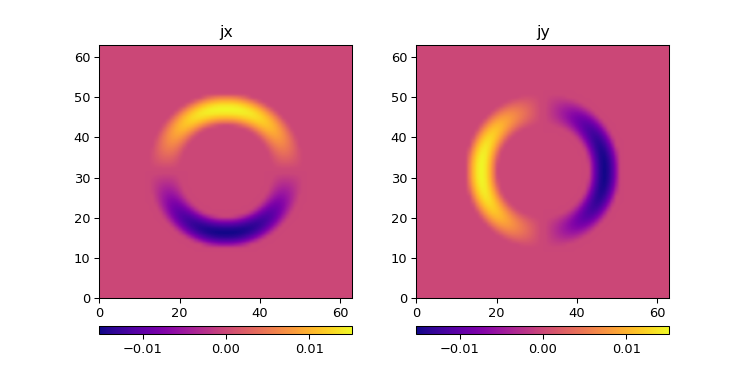

In [49]:
######### / animation /########################################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

fig, (axJx, axJy) = plt.subplots(ncols=2, figsize=(8,4))

axJx.set_title("jx")
jx_ = set_imshow(axJx, jx, "plasma", SIZE_X, SIZE_Y)
set_colorbar(jx_)

axJy.set_title("jy")
jy_ = set_imshow(axJy, jy, "plasma", SIZE_X, SIZE_Y)
set_colorbar(jy_)


time_ = fig.text(0.41, 1.02, '', transform=axJx.transAxes)




'''
def redraw(i):
    global dt
    Field_.set_data(Field[i])
    
    i_ = i*DTS*dt
    time_.set_text('%.2f $t\ {\cdot}\ w_p$' % i_)
    
    return Field_, time_ 


anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=int(TIME/DTS),
                               interval=5,
                               blit=True,
                               )

#anim.save("jx(r, t).gif", writer="imagemagick", fps = 30)
'''

plt.show()